<a href="https://colab.research.google.com/github/Seong-jieun/Tableau_Dashboard/blob/main/Goodreads_books_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요

- Goodreads API를 통해 수집된 데이터로 책 제목, 저자, 평점 등의 정보가 담겨있다
- 출처: https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks
- EDA

# 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/personal_da_project/books.csv', on_bad_lines = 'skip')

In [ ]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
df.shape

(11123, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [ ]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

< 컬럼 정보 >
- bookID: 책 고유 ID
- title: 책 제목
- authors: 작가
- average_rating: 평균 평점
- isbn: 각 출판사가 출판한 각각의 도서에 국제적으로 표준화하여 붙이는 고유의 도서번호
- isbn13: 기존의 10자리 ISBN의 가용성 향상을 위해 2007년에 만든 것
- language_code: 책에서 사용하는 언어
- num_pages: 페이지 수
- ratings_count: 평점이 매겨진 수
- text_reviews_count: 텍스트 리뷰가 남겨진 수
- publication_date: 출판일자
- publisher: 출판사

# 데이터 전처리

In [ ]:
# '  num_pages' 컬럼명 변경
df.rename(columns = {'  num_pages':'num_pages'}, inplace = True)

In [ ]:
# 출판 연도 컬럼 생성
df['publication_year'] = df['publication_date'].str[-4:].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
 12  publication_year    11123 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.1+ MB


In [ ]:
# df.to_csv('books_preprocessed.csv', index = False)

# EDA

## authors

In [ ]:
# 해당 데이터에 포함된 총 작가 수 구하기
# '/' 기준으로 분해
cnt_authors = df['authors'].str.split('/').explode().value_counts()

print(f'해당 데이터에 포함된 총 작가 수는 {cnt_authors.count()}명이다. (그림작가 포함)')

해당 데이터에 포함된 총 작가 수는 9231명이다. (그림작가 포함)


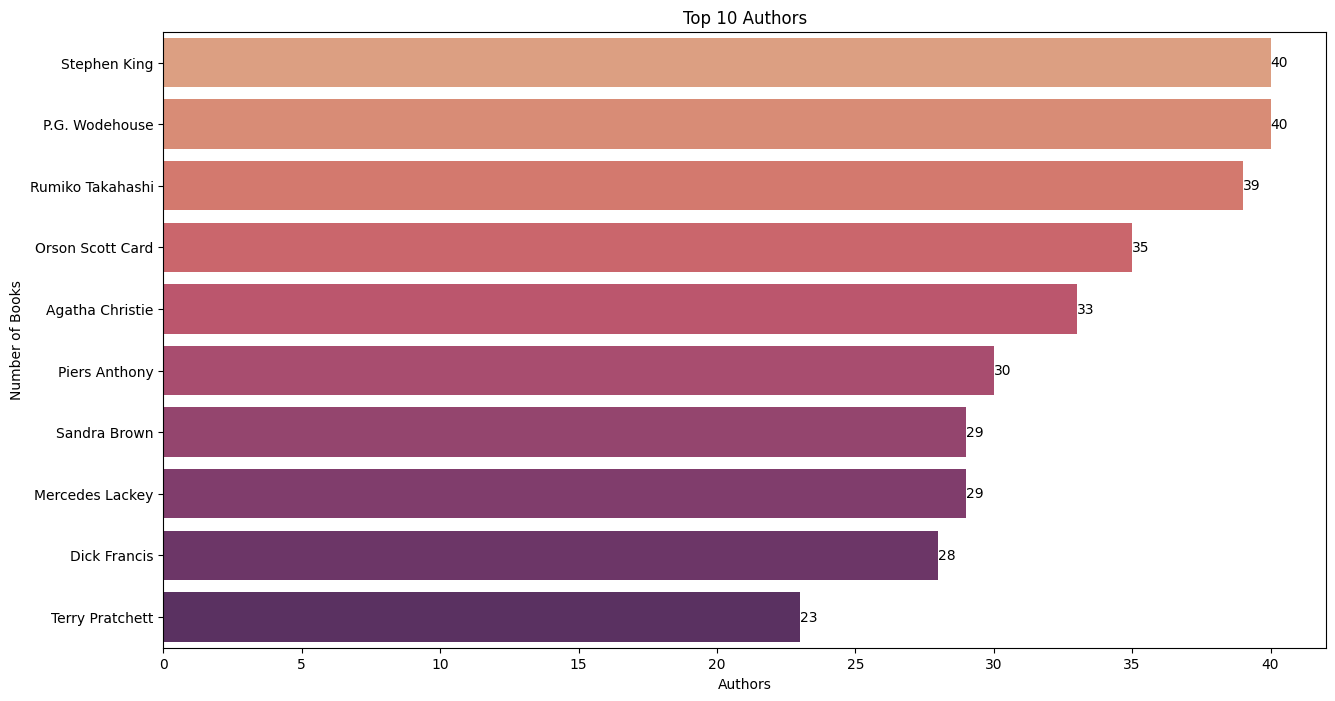

In [ ]:
# 작품 수가 많은 작가 상위 10명 (작가 top 10)
authors_top10 = df['authors'].value_counts().head(10)

plt.figure(figsize = (15, 8))
sns.barplot(y = authors_top10.index, x = authors_top10.values, palette='flare')

# 차트위에 값 표시
for p in plt.gca().patches:
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2, int(p.get_width()), ha='left', va='center')

plt.title('Top 10 Authors')
plt.xlabel('Authors')
plt.ylabel('Number of Books')
plt.show()

In [ ]:
# authors_top10의 평균 작품 수
print(f'작가 top 10의 평균 작품 수는 {authors_top10.mean()}권이다.')

작가 top 10의 평균 작품 수는 32.6권이다.


## average_rating

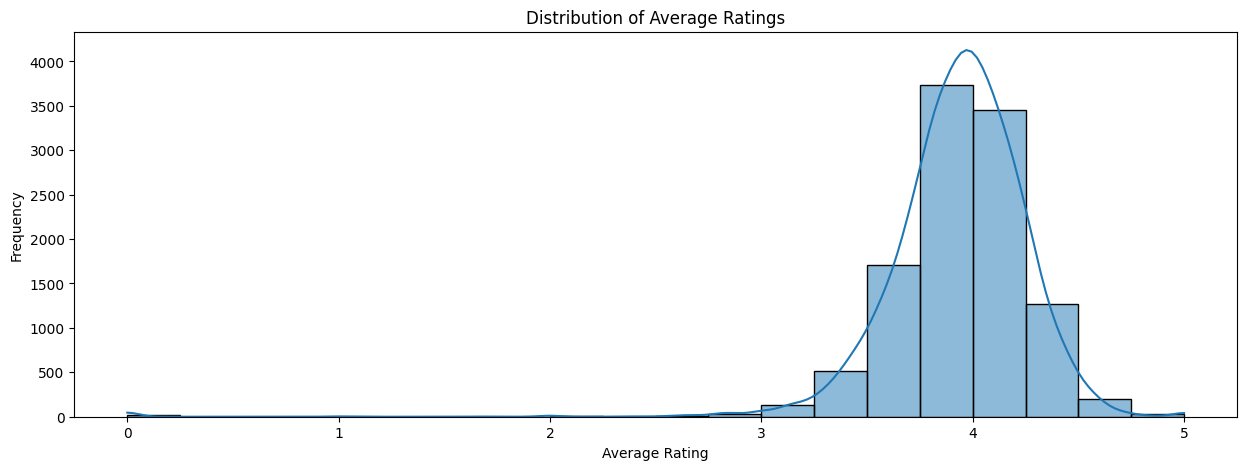

In [ ]:
# 전체 평균 평점 분포
plt.figure(figsize=(15, 5))
sns.histplot(df['average_rating'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

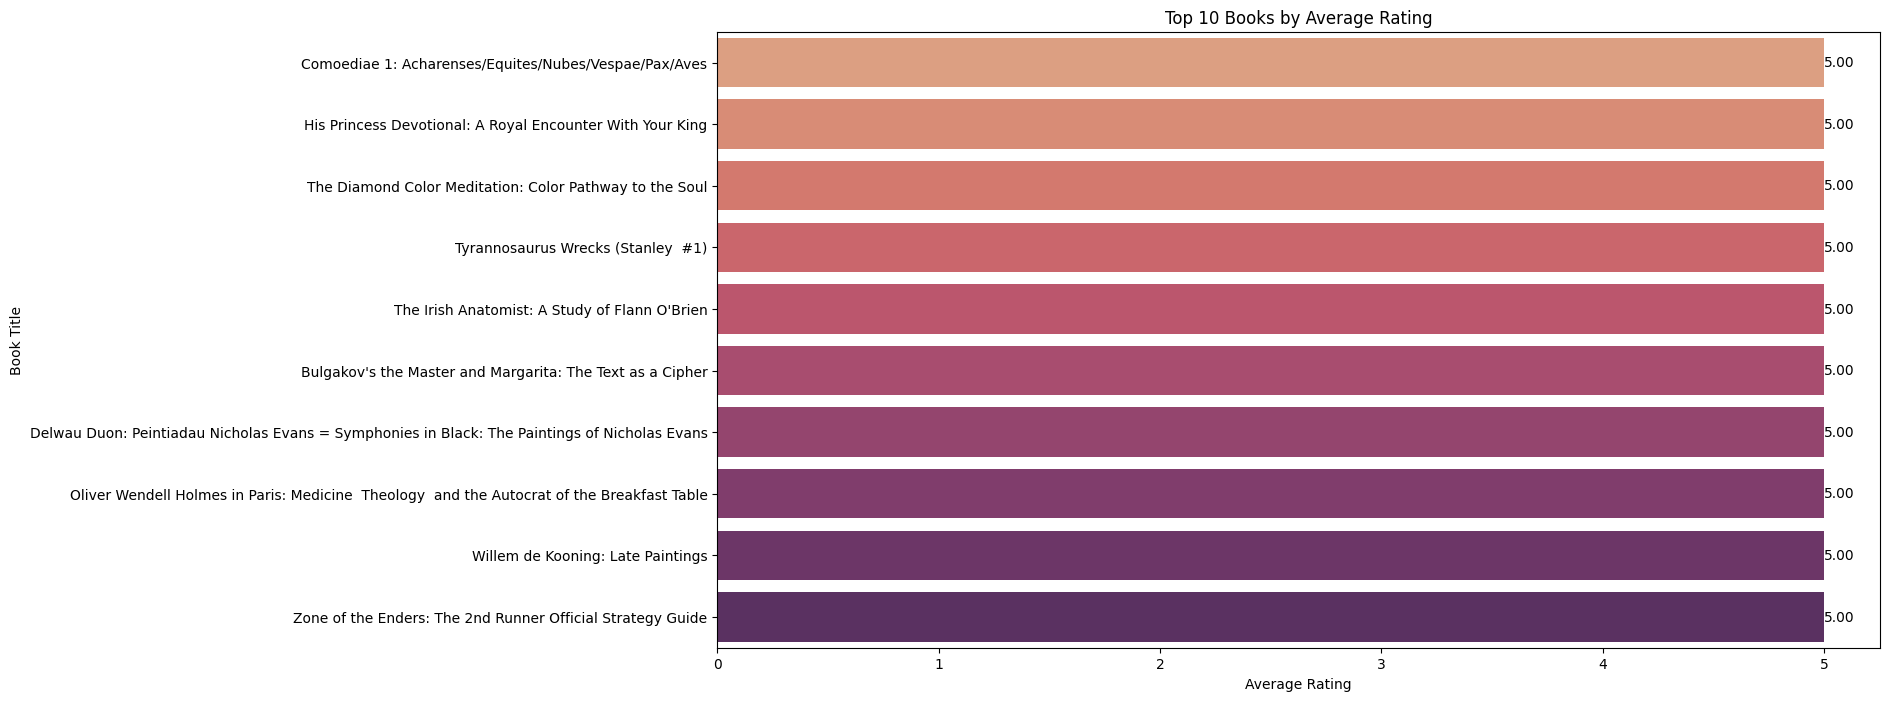

In [ ]:
# 평점이 높은 상위 10개 작품
rating = df.sort_values('average_rating', ascending = False).head(10).set_index('title')

plt.figure(figsize = (15, 8))
sns.barplot(y = rating.index, x = rating['average_rating'], palette='flare')

for p in plt.gca().patches:
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{p.get_width():.2f}', ha='left', va='center')

plt.title('Top 10 Books by Average Rating')
plt.ylabel('Book Title')
plt.xlabel('Average Rating')
plt.show()

In [ ]:
# 평균 평점이 5.0점인 작품 수 구하기
print(f'평균 평점이 5.0점인 작품 수는 {df[df["average_rating"] == 5.0].shape[0]}개이다.')

평균 평점이 5.0점인 작품 수는 22개이다.


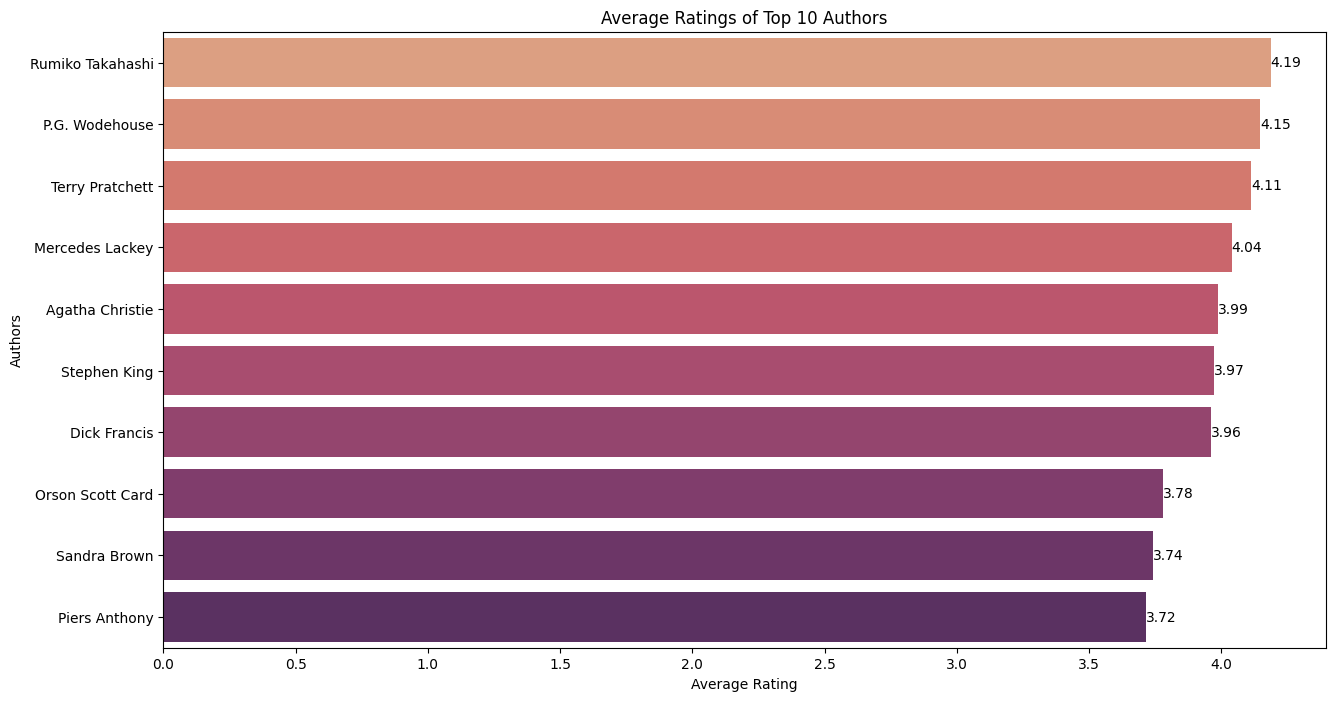

In [ ]:
# 작품 수가 많은 작가 상위 10명의 평균 평점
rating_top10 = df[df['authors'].isin(authors_top10.index)].groupby('authors')['average_rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(y=rating_top10.index, x=rating_top10.values, palette='flare')

for p in plt.gca().patches:
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{p.get_width():.2f}', ha='left', va='center')

plt.title('Average Ratings of Top 10 Authors')
plt.ylabel('Authors')
plt.xlabel('Average Rating')
plt.show()

In [ ]:
# 작가 top10의 평균 평점
print(f'작가 top 10의 평균 평점은 {rating_top10.mean():.2f}점이다.')

작가 top 10의 평균 평점은 3.96점이다.


## language_code

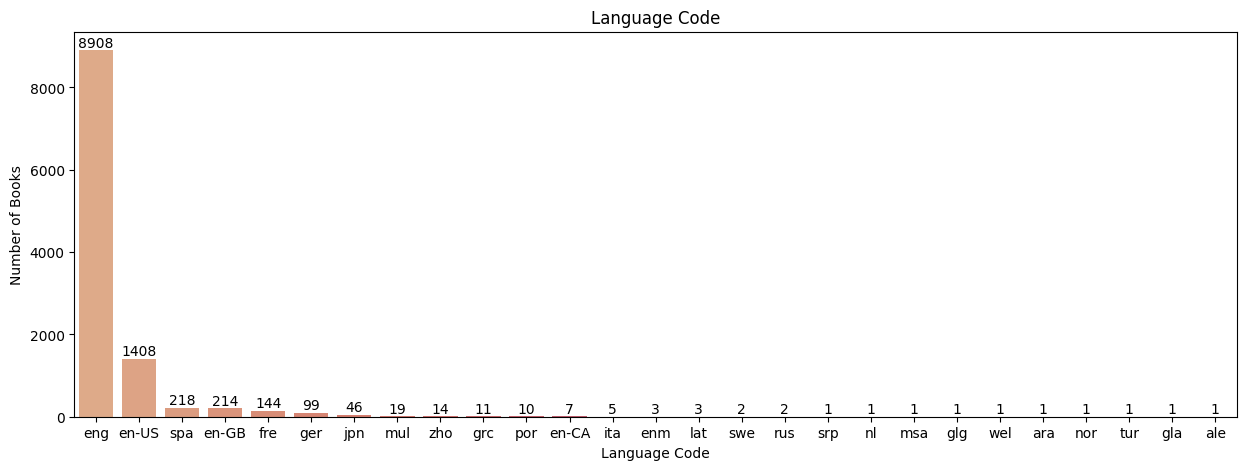

In [ ]:
# language_code 분포
language = df['language_code'].value_counts()

plt.figure(figsize = (15, 5))
sns.barplot(x = language.index, y = language.values, palette='flare')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

plt.title('Language Code')
plt.xlabel('Language Code')
plt.ylabel('Number of Books')
plt.show()

In [ ]:
# 작품수가 많은 상위10명 작가의 사용언어 분포
lan_author_top10 = df[df['authors'].isin(authors_top10.index)].groupby('authors')['language_code'].value_counts().unstack().fillna(0)
lan_author_top10

language_code,en-GB,en-US,eng,fre,ger,jpn,spa
authors,,,,,,,
Agatha Christie,0.0,1.0,32.0,0.0,0.0,0.0,0.0
Dick Francis,0.0,2.0,26.0,0.0,0.0,0.0,0.0
Mercedes Lackey,2.0,10.0,17.0,0.0,0.0,0.0,0.0
Orson Scott Card,2.0,6.0,26.0,1.0,0.0,0.0,0.0
P.G. Wodehouse,0.0,3.0,37.0,0.0,0.0,0.0,0.0
Piers Anthony,1.0,11.0,18.0,0.0,0.0,0.0,0.0
Rumiko Takahashi,0.0,7.0,17.0,0.0,0.0,14.0,1.0
Sandra Brown,0.0,1.0,27.0,0.0,1.0,0.0,0.0
Stephen King,1.0,3.0,34.0,0.0,0.0,0.0,2.0


In [ ]:
# lan_author_top10의 language_code별 합계 구한 후 데이터프레임 새로 생성
lan_columns = ['en_GB', 'en_US', 'eng', 'fre', 'jpn', 'spa']

en_GB = lan_author_top10['en-GB'].sum()
en_US = lan_author_top10['en-US'].sum()
eng = lan_author_top10['eng'].sum()
fre = lan_author_top10['fre'].sum()
jpn = lan_author_top10['jpn'].sum()
spa = lan_author_top10['spa'].sum()

lan_authors = pd.DataFrame(data = [[en_GB, en_US, eng, fre, jpn, spa]], columns = lan_columns)
lan_authors

,en_GB,en_US,eng,fre,jpn,spa
0,7.0,46.0,254.0,1.0,14.0,3.0


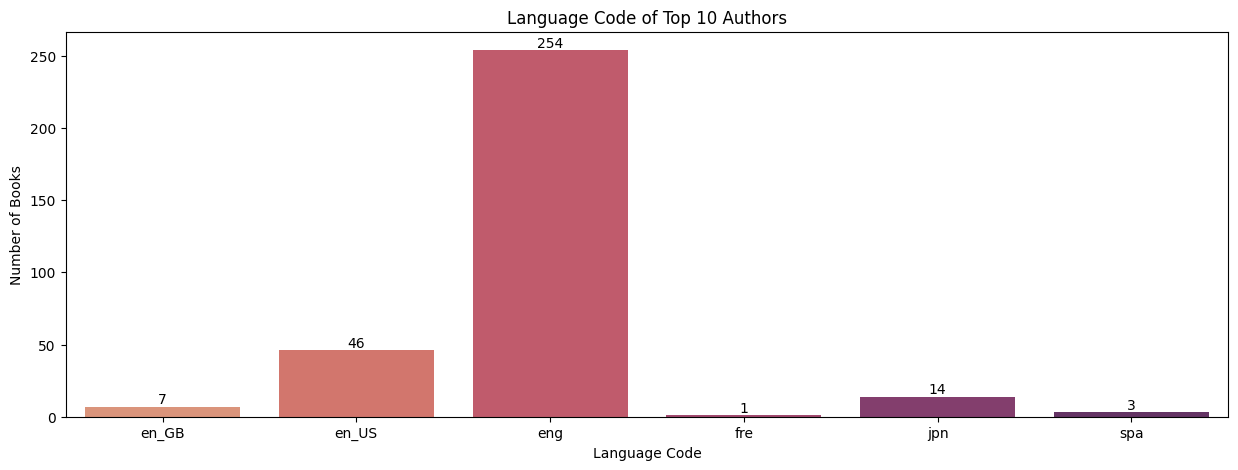

In [ ]:
# 작품수가 많은 상위10명 작가의 사용언어 분포 시각화
plt.figure(figsize = (15, 5))
sns.barplot(data = lan_authors, palette='flare')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

plt.title('Language Code of Top 10 Authors')
plt.xlabel('Language Code')
plt.ylabel('Number of Books')
plt.show()

## num_pages

In [ ]:
# 최소, 최대, 평균 페이지 수 확인
print(f'최소 페이지 수 : {df["num_pages"].min()}, 최대 페이지 수 : {df["num_pages"].max()}, 평균 페이지 수 : {df["num_pages"].mean().round(2)}')

최소 페이지 수 : 0, 최대 페이지 수 : 6576, 평균 페이지 수 : 336.41


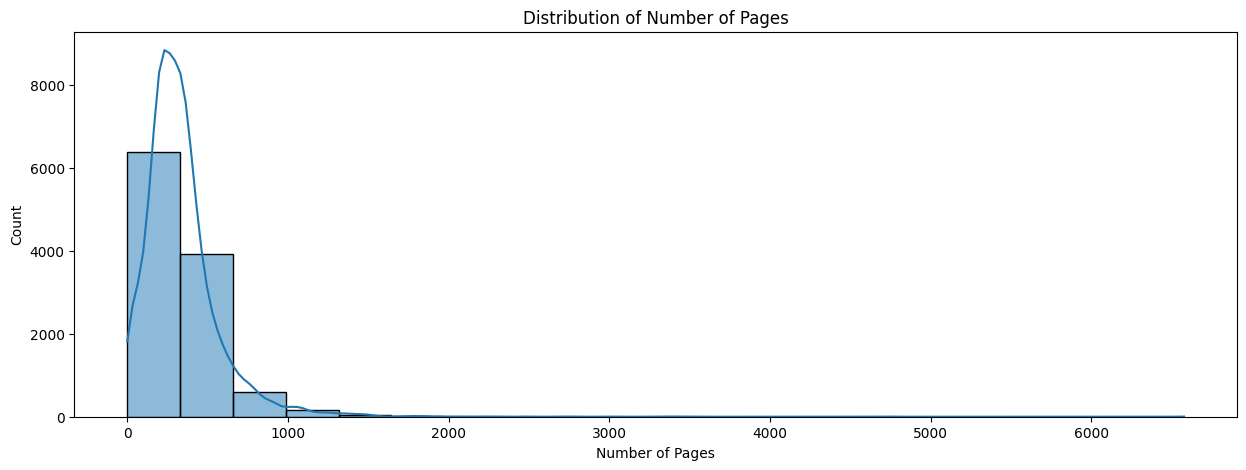

In [ ]:
# 페이지 수 분포 확인
plt.figure(figsize = (15, 5))
sns.histplot(df['num_pages'], bins=20, kde=True)
plt.title('Distribution of Number of Pages')
plt.xlabel('Number of Pages')
plt.show()

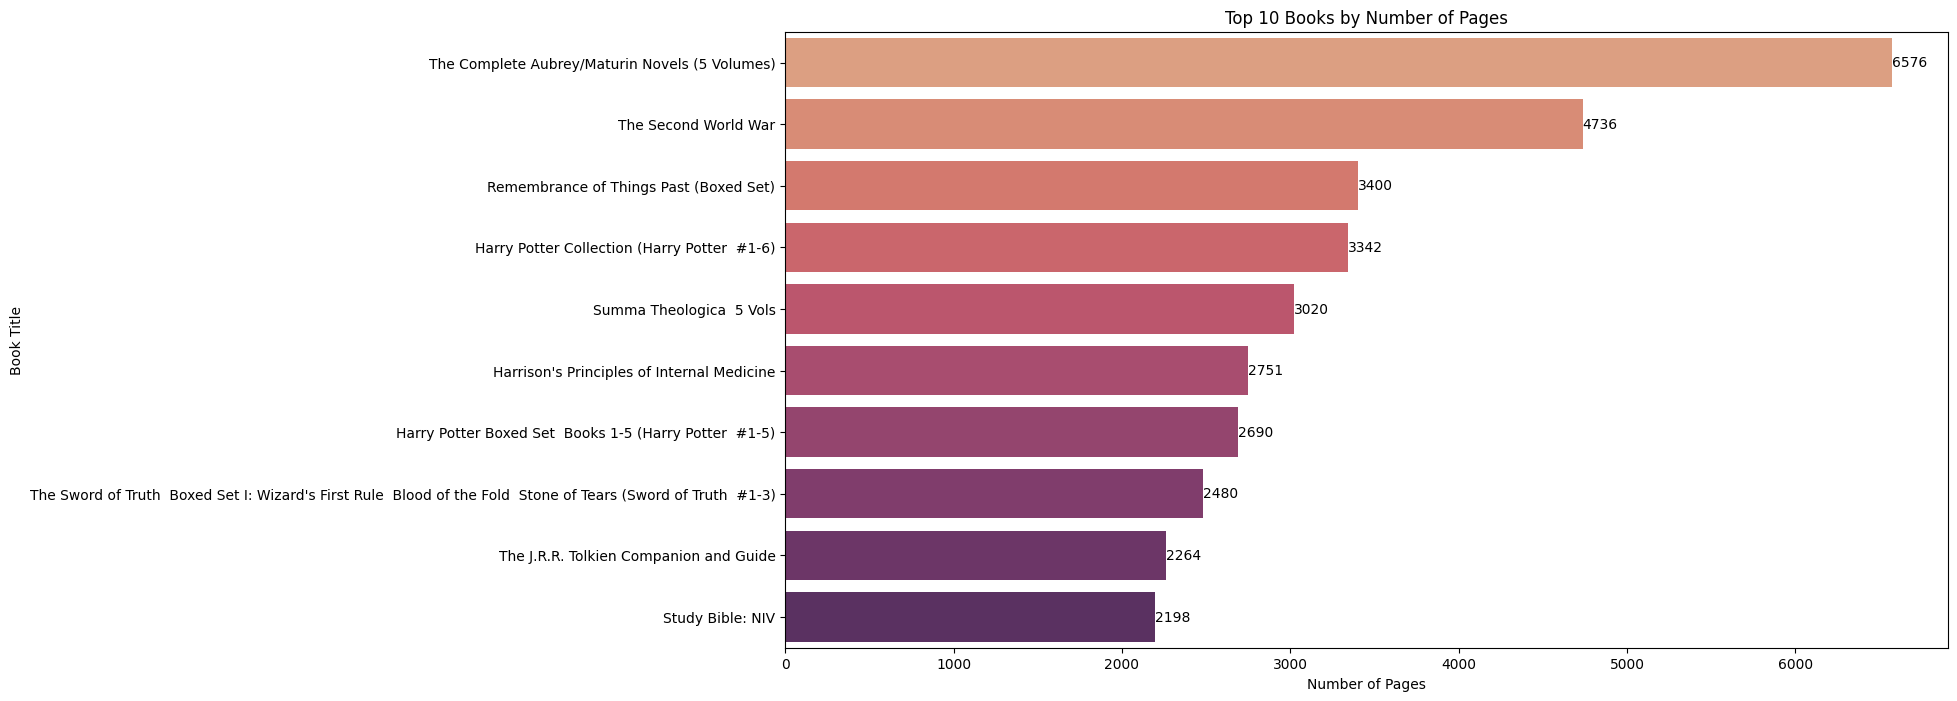

In [ ]:
# 페이지 수가 많은 책 상위 10권
pages_top10 = df.sort_values('num_pages', ascending = False).head(10).set_index('title')

plt.figure(figsize = (15, 8))
sns.barplot(y = pages_top10.index, x = pages_top10['num_pages'], palette='flare')

for p in plt.gca().patches:
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2, int(p.get_width()), ha='left', va='center')

plt.title('Top 10 Books by Number of Pages')
plt.ylabel('Book Title')
plt.xlabel('Number of Pages')
plt.show()

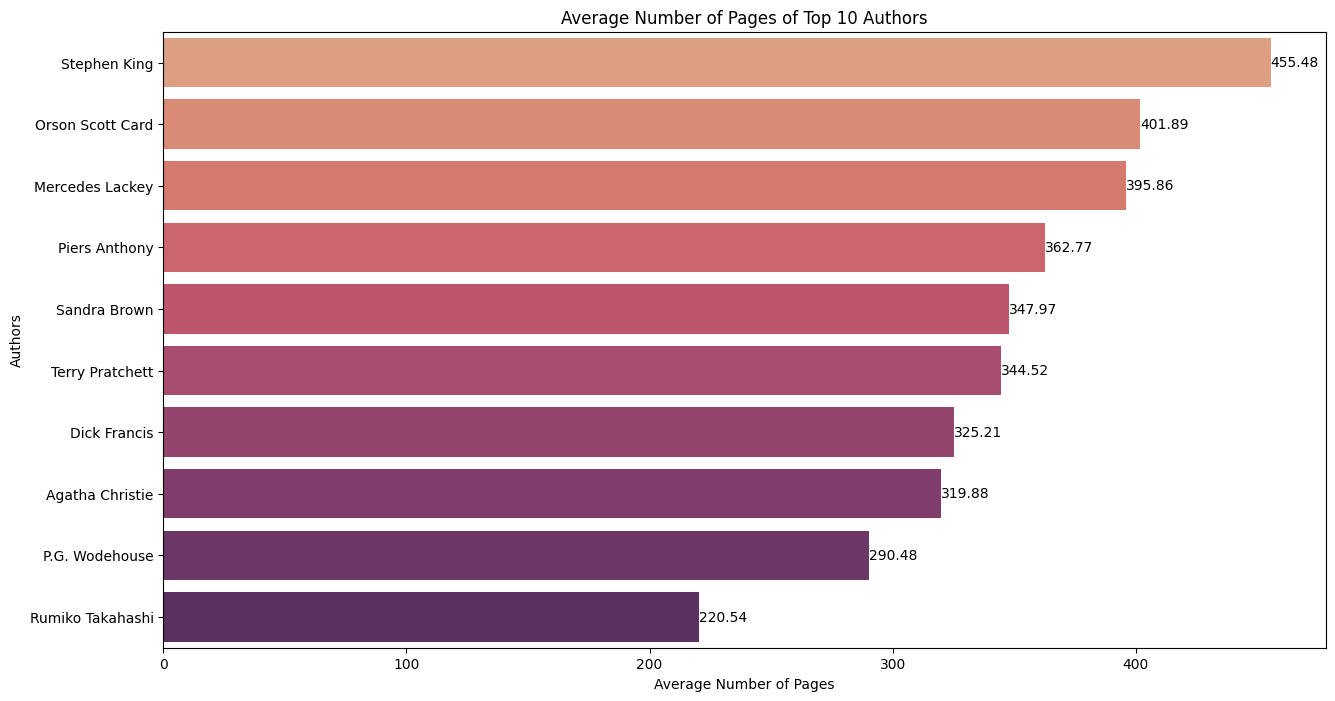

In [ ]:
# 작품 수가 많은 작가 상위 10명의 평균 페이지 수
pages_top10 = df[df['authors'].isin(authors_top10.index)].groupby('authors')['num_pages'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(y=pages_top10.index, x=pages_top10.values, palette='flare')

for p in plt.gca().patches:
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{p.get_width():.2f}', ha='left', va='center')

plt.title('Average Number of Pages of Top 10 Authors')
plt.ylabel('Authors')
plt.xlabel('Average Number of Pages')
plt.show()

In [ ]:
# 작가 top10의 평균 페이지 수
print(f'작가 top10의 평균 페이지 수는 {pages_top10.mean():.2f}페이지이다.')

작가 top10의 평균 페이지 수는 346.46페이지이다.


## ratings_count

In [ ]:
# 평점이 매겨진 수의 평균
print(f'평점이 매겨진 수의 평균은 {df["ratings_count"].mean():.2f}건이다.')

평점이 매겨진 수의 평균은 17942.85건이다.


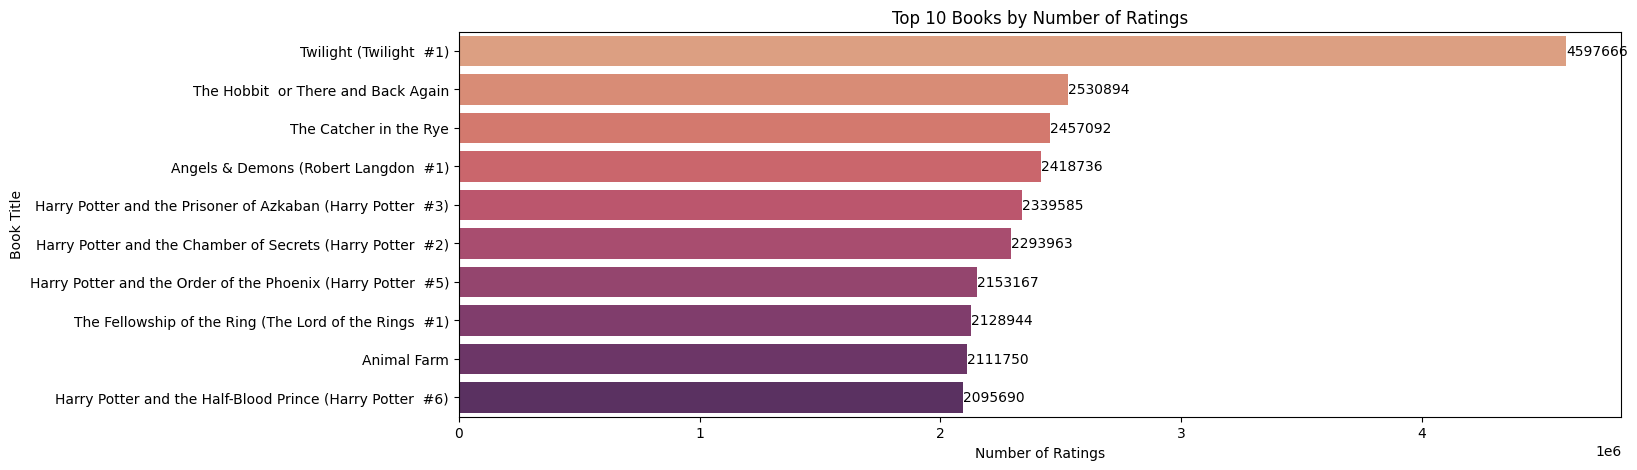

In [ ]:
# 평점이 많이 매겨진 책 상위 10권
rating_cnt = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')

plt.figure(figsize = (15, 5))
sns.barplot(y = rating_cnt.index, x = rating_cnt['ratings_count'], palette='flare')

for p in plt.gca().patches:
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2, int(p.get_width()), ha='left', va='center')

plt.title('Top 10 Books by Number of Ratings')
plt.ylabel('Book Title')
plt.xlabel('Number of Ratings')
plt.show()

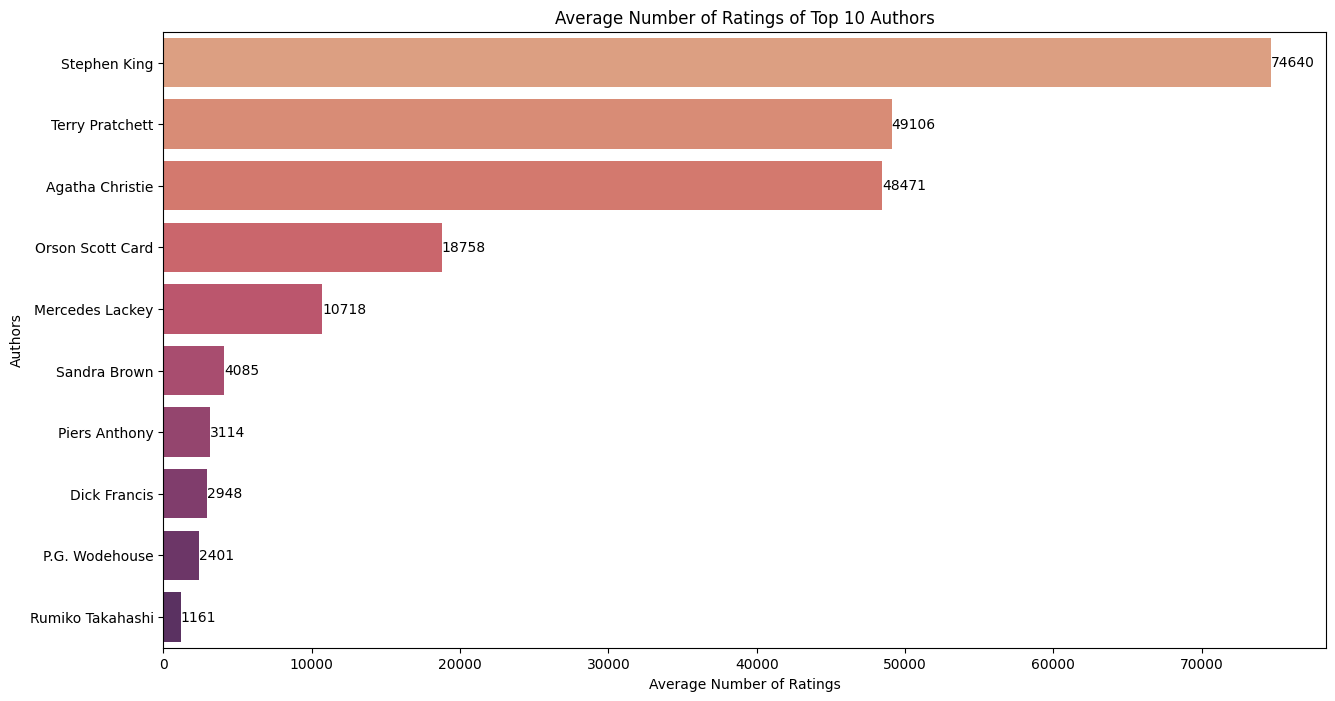

In [ ]:
# 작품 수가 많은 작가 상위 10명의 평균 평점 수(평점이 매겨진 수)
rating_cnt_top10 = df[df['authors'].isin(authors_top10.index)].groupby('authors')['ratings_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(y=rating_cnt_top10.index, x=rating_cnt_top10.values, palette='flare')

for p in plt.gca().patches:
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2, int(p.get_width()), ha='left', va='center')

plt.title('Average Number of Ratings of Top 10 Authors')
plt.ylabel('Authors')
plt.xlabel('Average Number of Ratings')
plt.show()

In [ ]:
# 작가 top10의 평점이 매겨진 수 평균
print(f'작가 top 10의 평점이 매겨진 수는 평균 {rating_cnt_top10.mean():.2f}건이다.')

작가 top 10의 평점이 매겨진 수는 평균 21540.70건이다.


## text_reviews_count

In [ ]:
# 텍스트 리뷰가 매겨진 평균 건수
print(f'텍스트 리뷰가 매겨진 건수는 평균 {df["text_reviews_count"].mean():.2f}건이다.')

텍스트 리뷰가 매겨진 건수는 평균 542.05건이다.


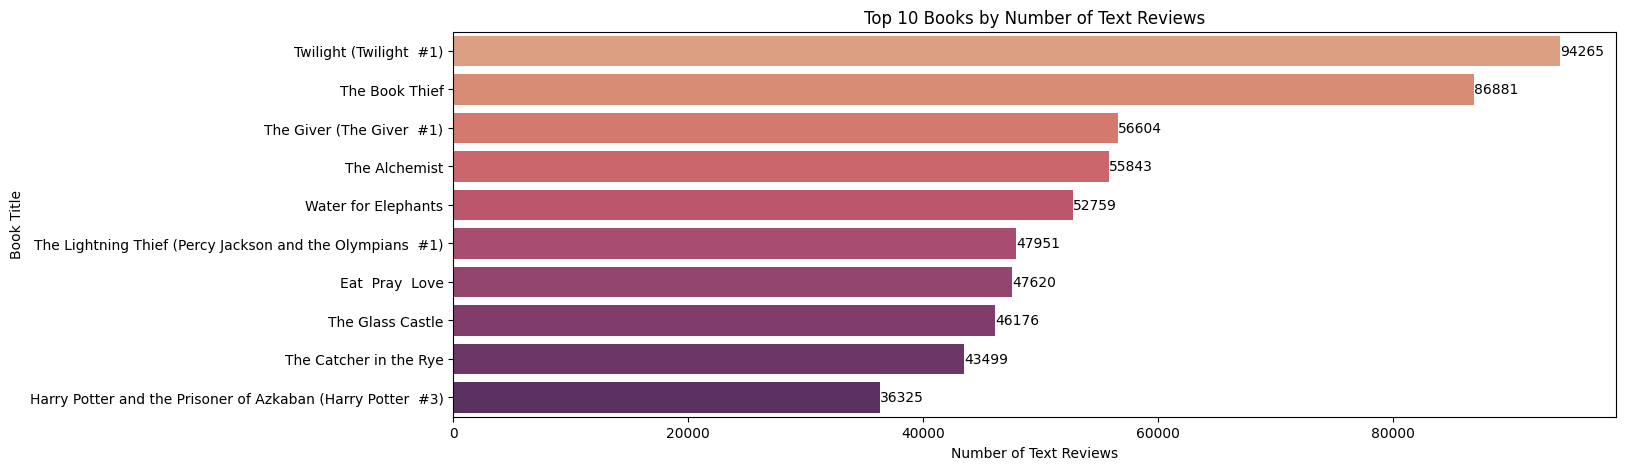

In [ ]:
# 텍스트 리뷰가 많이 매겨진 책 상위 10권
text_cnt = df.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')

plt.figure(figsize = (15, 5))
sns.barplot(y = text_cnt.index, x = text_cnt['text_reviews_count'], palette='flare')

for p in plt.gca().patches:
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2, int(p.get_width()), ha='left', va='center')

plt.title('Top 10 Books by Number of Text Reviews')
plt.ylabel('Book Title')
plt.xlabel('Number of Text Reviews')
plt.show()

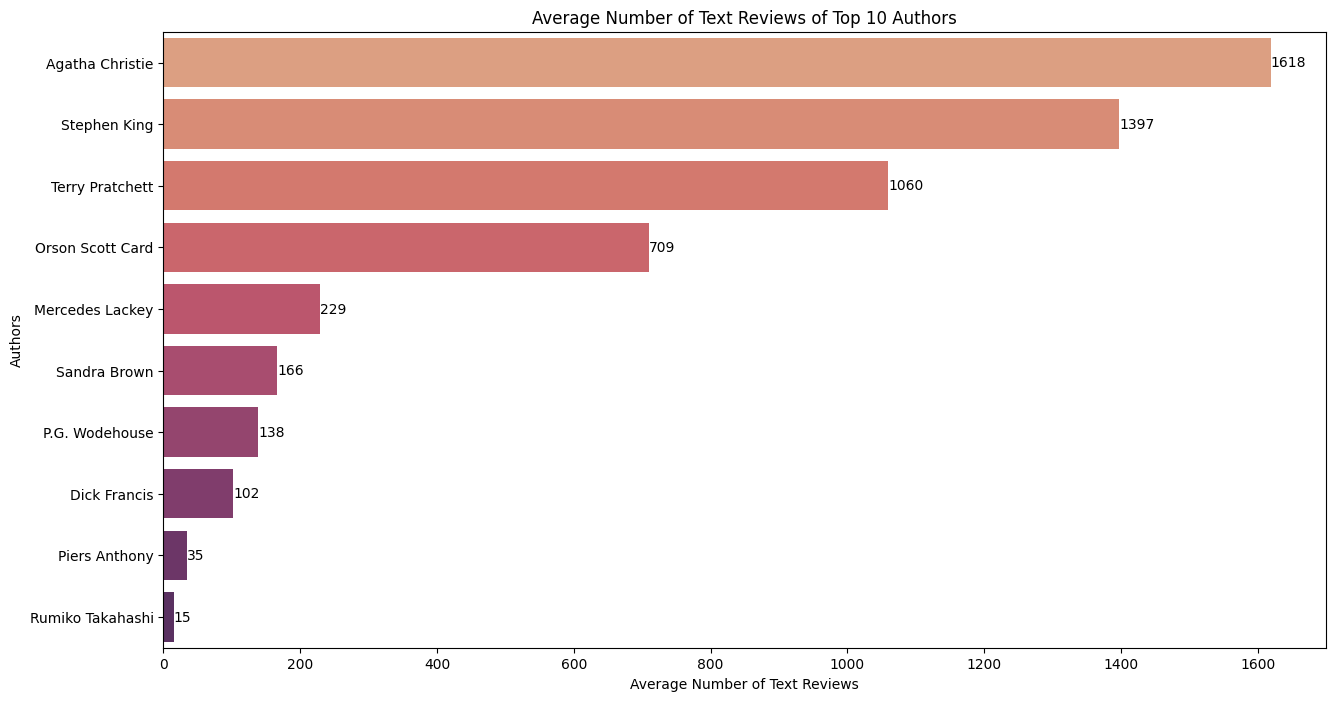

In [ ]:
# 작품 수가 많은 작가 상위 10명의 텍스트 리뷰 수
text_cnt_top10 = df[df['authors'].isin(authors_top10.index)].groupby('authors')['text_reviews_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(y=text_cnt_top10.index, x=text_cnt_top10.values, palette='flare')

for p in plt.gca().patches:
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2, int(p.get_width()), ha='left', va='center')

plt.title('Average Number of Text Reviews of Top 10 Authors')
plt.ylabel('Authors')
plt.xlabel('Average Number of Text Reviews')
plt.show()

In [ ]:
# 작가 top10의 평균 텍스트 리뷰 건수
print(f'작가 top 10의 평균 텍스트 리뷰 건수는 평균 {text_cnt_top10.mean():.2f}건이다.')

작가 top 10의 평균 텍스트 리뷰 건수는 평균 547.30건이다.


## publisher

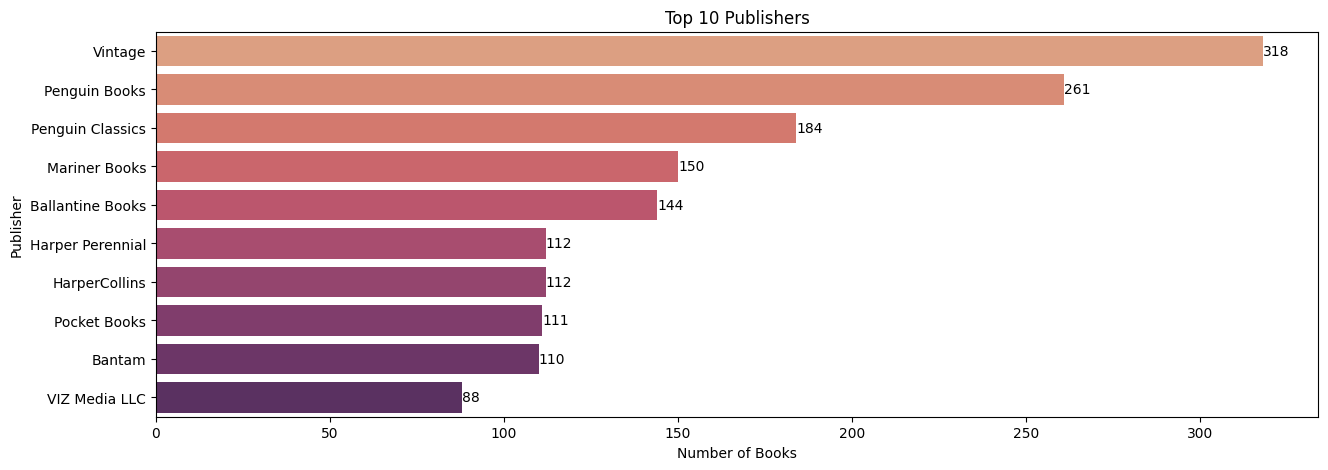

In [ ]:
# 출판 작품 수가 많은 상위 10개 출판사
pub_cnt = df['publisher'].value_counts().head(10)

plt.figure(figsize = (15, 5))
sns.barplot(y = pub_cnt.index, x = pub_cnt.values, palette='flare')

for p in plt.gca().patches:
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2, int(p.get_width()), ha='left', va='center')

plt.title('Top 10 Publishers')
plt.ylabel('Publisher')
plt.xlabel('Number of Books')
plt.show()

## publication_year

In [ ]:
# 출판연도 범위 확인
print(f'해당 데이터의 출판연도 범위는 {df["publication_year"].min()}년부터 {df["publication_year"].max()}년까지이다.')

해당 데이터의 출판연도 범위는 1900년부터 2020년까지이다.


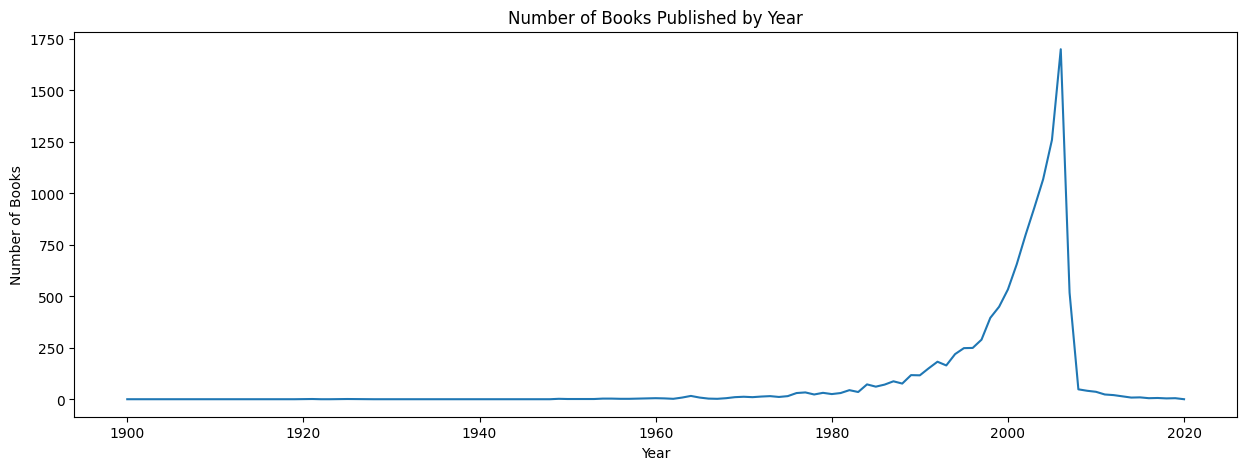

In [ ]:
# 출판연도 추이
year = df.groupby('publication_year').size().reset_index(name='count')

plt.figure(figsize = (15, 5))
sns.lineplot(data=year, x = 'publication_year', y = 'count', palette='flare')

plt.title('Number of Books Published by Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

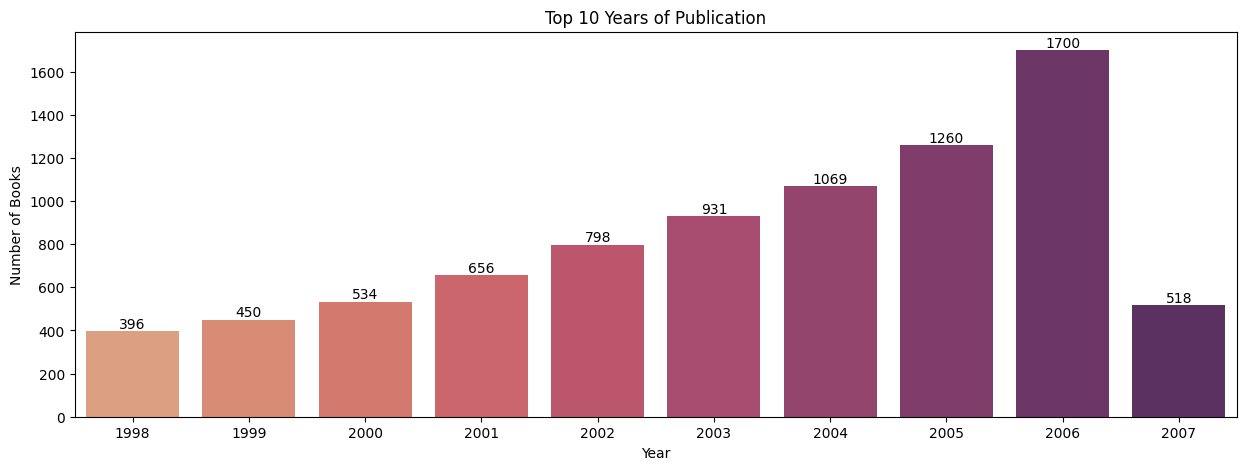

In [ ]:
# 작품이 많이 출판된 상위 10개 연도별 작품 출판 수 확인
year_cnt = df['publication_year'].value_counts(ascending=False).head(10)

plt.figure(figsize = (15, 5))
sns.barplot(x = year_cnt.index, y = year_cnt.values, palette='flare')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')

plt.title('Top 10 Years of Publication')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

# 요약

- 해당 데이터에 포함된 총 작가 수는 그림작가 포함 9,231명이다
- 작가 top 10의 평균 작품 수는 32.6권이다
---
- 전체 평균 평점은 주로 4점 전후에 분포한다
- 평점이 높은 상위 10개 작품은 모두 평점이 5점이었는데, 평점이 5점인 작품 수는 22개이다
- 작가 top 10의 평점은 최소 3.72점에서 최대 4.19점이었으며 평균 3.96점이다
---
- 사용 언어는 영어가 압도적으로 많았다
- 작가 top 10의 사용언어 또한 영어가 많았으며 영어 다음으로는 일본어가 많이 사용되었는데 이는 작가 top 10에 포함된 일본인 작가 다카하시 루미코의 영향으로 보인다
---
- 책 페이지 수는 최소 0페이지, 최대 6,576페이지로 확인되었다
- 0페이지인 경우가 많았는데 책 페이지가 0페이지인 경우는 없으므로 데이터 상의 결측치로 보인다
- 평균 페이지 수는 336.41페이지이다
- 작가 top10의 평균 페이지 수는 346.46페이지이다
---
- 평균적으로 17,942.85건의 평점이 매겨졌다
- 작가 top 10은 평균 21540.70건의 평점이 매겨졌다
---
- 텍스트 리뷰가 매겨진 건수는 평균 542.05건이다
- 작가 top 10의 평균 텍스트 리뷰 건수는 평균 547.30건이다
- => 작가 top 10은 평점과 텍스트 리뷰가 평균보다 많이 등록되었다
---
- 가장 많은 작품을 출판한 출판사는 'Vintage'로 318권을 출판했다
---
-  해당 데이터의 출판연도 범위는 1900년부터 2020년까지이다
- 1998년부터 2006년까지 작품 출판 수가 꾸준히 증가했으며 2006년에 최고치인 1,700건이 출판되었다
- 2007년에는 518건으로 급감했다